In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#pregunta 1

"""Una casa de apuestas paga 3 por Cara y 1.2 por Sello. La moneda tiene 0.5 de probabilidad de que salga Cara o Sello. Si estamos obligados a apostar todos nuestros recursos cada vez que jugamos, ¿qué proporción conviene apostar a Cara y qué proporción a Sello?. Notar que si apostamos todo a Cara y la moneda resulta que sale Sello, perdemos todos los recursos y no vamos a poder volver a jugar, nos quedamos en cero."""


C:\Users\Damian\AppData\Local\Temp\ipykernel_8344\1761574249.py:9: RuntimeWarning: divide by zero encountered in log
  Gf = p * np.log(r_cara * f) + (1 - p) * np.log(r_sello * (1 - f))


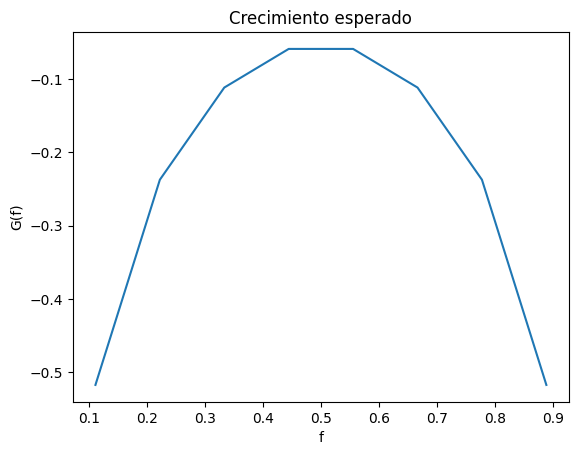

In [46]:
p = 0.5
r_cara = 3
r_sello = 1.2

# proporcion entre capital alocado a cara y sello
f = np.linspace(0, 1, 10)

# crecimiento esperado (ie, log de la media geometrica)
Gf = p * np.log(r_cara * f) + (1 - p) * np.log(r_sello * (1 - f))

plt.plot(f, Gf)
plt.xlabel("f")
plt.ylabel("G(f)")
plt.title("Crecimiento esperado")
plt.show()

C:\Users\Damian\AppData\Local\Temp\ipykernel_6080\4184733104.py:23: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(M), color=color)


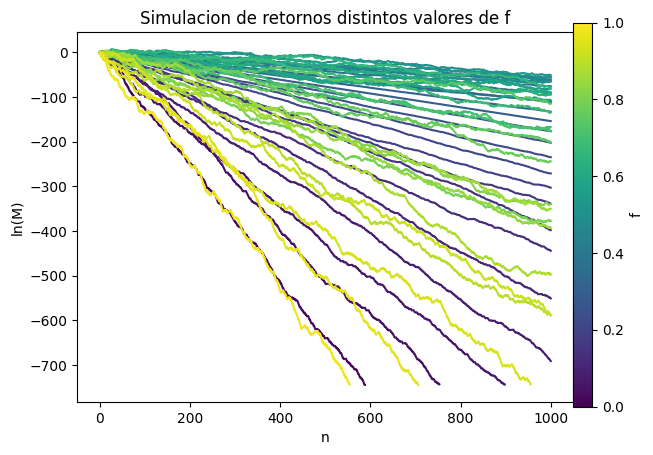

In [47]:
def simulate_game(n=1000, f=0.5):
    M0 = 1

    M = [1]
    for _ in range(n):
        coin = np.random.choice([0, 1], p=[0.5, 0.5])
        if coin == 0:
            M0 = M0 * 3 * f
        else:
            M0 = M0 * 1.2 * (1 - f)
        M.append(M0)
    return M


f = np.linspace(0, 1, 50)
Mf = [simulate_game(f=f) for f in f]

# Use a colormap for distinct colors
cmap = plt.cm.viridis
colors = cmap(f)

for M, color in zip(Mf, colors):
    plt.plot(np.log(M), color=color)

plt.xlabel("n")
plt.ylabel("ln(M)")
plt.title("Simulacion de retornos distintos valores de f")
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(f)  
plt.colorbar(sm, label="f", cax=plt.axes([0.9, 0.1, 0.03, 0.8]))
plt.show()